In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

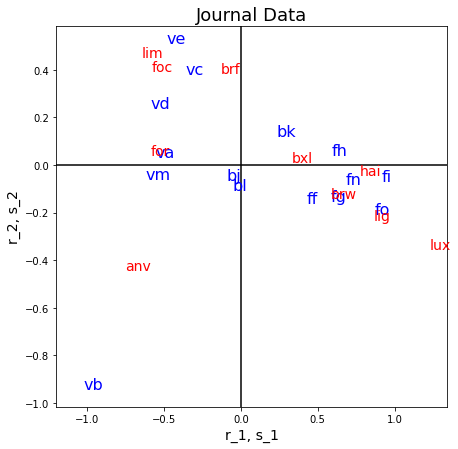

In [2]:
x = pd.read_csv("journaux.dat", sep = "\s+", header=None)
a = x.sum(axis = 1)
b = x.sum(axis = 0)
e = np.reshape(np.array(a), (len(a), -1)) @ (np.reshape(np.array(b), (-1, len(b)))/sum(a))
# chi-matrix
cc = (x - e)/np.sqrt(e)

g, l, d = np.linalg.svd(cc, full_matrices = False)
ll = l**2 #eigenvalues
aux = np.cumsum(ll)/sum(ll)
perc = np.vstack((ll, aux))
r1 = np.multiply(np.tile(l, (g.shape[0], 1)), g)
r = r1/np.tile(np.reshape(np.array(np.sqrt(a)), (len(a), -1)), (1, g.shape[1]))
s1 = np.multiply(np.tile(l, (d.shape[0], 1)), d.T)
s = s1/np.tile(np.reshape(np.array(np.sqrt(b)), (len(b), -1)), (1, d.shape[1]))


# contribution in r
car = np.tile(np.reshape(np.array(a), (len(a), -1)), (1, r.shape[1])) \
    * r**2/np.tile(np.reshape(np.array(ll), (len(ll), -1)), (1, r.shape[0])).T

# contribution in s
cas = np.tile(np.reshape(np.array(b), (len(b), -1)), (1, s.shape[1])) \
    * s**2/np.tile(np.reshape(np.array(ll), (len(ll), -1)), (1, s.shape[0])).T
    
types    = ["va", "vb", "vc", "vd", "ve", "ff", "fg", "fh", "fi", "bj", "bk", 
            "bl", "vm", "fn", "fo"]
regions  = ["brw", "bxl", "anv", "brf", "foc", "for", "hai", "lig", "lim", "lux"]


fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(r[:, 0], r[:, 1], c = "w")
ax.scatter(s[:, 0], s[:, 1], c = "w")
for i in range(0, len(types)):
    ax.text(r[i, 0], r[i, 1], types[i], c = "b", fontsize = 16)
for i in range(0, len(regions)):
    ax.text(s[i, 0], s[i, 1], regions[i], c = "r", fontsize = 14)

ax.set_xlim(-1.2, )
ax.axvline(0, c = "k")
ax.axhline(0, c = "k")
ax.set_xlabel("r_1, s_1", fontsize = 14)
ax.set_ylabel("r_2, s_2", fontsize = 14)
plt.title("Journal Data", fontsize = 18)

plt.show()